# Bases de datos 

Para los análisis se toman las bases de datos, última actualización, de organizaciones internacionales y nacionales:

    - ONU 
    - OMS 
    - INS 
    - DANE

### Variables para análisis:

In [1]:
pais = 'Colombia'

departamento = 'Caldas'

municipio = 'Manizales'

variable_buscar = 'Estado'  # puede ser 'Atención' o 'Estado'

estado = 'Fallecido'  # Si atención:  ['Recuperado', 'Hospital', 'Hospital UCI', nan, 'Casa']
                   # Si Estado:   ['Leve', 'Asintomático', 'Fallecido', 'Moderado', 'Grave', nan]

ano = '2020'

In [2]:
import pandas as pd
pd.set_option("display.precision", 2)
pd.set_option('display.max_rows',1000)

from matplotlib import pyplot as plt
#print(plt.style.available)
#plt.style.use('fivethirtyeight')
plt.xkcd()
from textwrap import wrap


In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Población mundial por países y proyección 2020  a 2100

In [4]:
mundo= pd.read_csv('poblacionMundial.csv', usecols= ['Country', '2020', 'Spanish'])

mundo.set_index('Spanish', inplace=True)
mundo

,Country,2020
Spanish,,
MUNDO,WORLD,7794799000
África,Africa,1340598000
Asia,Asia,4641055000
Europa,Europe,747636000
América Latina y el Caribe,Latin America and the Caribbean,653962000
América del norte,Northern America,368870000
Oceanía,Oceania,42678000
Burundi,Burundi,11891000
Comoras,Comoros,870000


## Total casos y número de fallecidos por país

In [5]:
covMun= pd.read_csv('CovidMundoT.csv', usecols= ['País', 'Total_Casos','Fallecidos'])
covMun

,País,Total_Casos,Fallecidos
0,Afghanistan,35289,1147
1,Albania,3906,107
2,Algeria,21948,1057
3,Andorra,880,52
4,Angola,638,29
5,Anguilla,3,0
6,Antigua and Barbuda,74,3
7,Argentina,114783,2133
8,Armenia,34462,631
9,Aruba,108,3


## Total casos y número de fallecidos Colombia por fecha, departamento, municipio, atención, edad, género, fechas de diagnóstico, recuperación o muerte.

In [6]:
covCol = pd.read_csv('CovidColombia.csv', usecols= ['Fecha de notificación', 
       'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad',
       'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'Fecha recuperado', 'Fecha diagnostico','Fecha de muerte', 
       'Tipo recuperación'], parse_dates = ['Fecha de notificación','Fecha de muerte', 'Fecha diagnostico','Fecha recuperado'], low_memory=False)

covCol['Fecha de muerte'] = pd.to_datetime(covCol['Fecha de muerte'], errors='coerce')

fechas =['Fecha de notificación']
for i in fechas:
    covCol[i] = pd.to_datetime(covCol[i])

cuadro_basico = covCol    
    
covCol

,Fecha de notificación,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnostico,Fecha recuperado,Tipo recuperación
0,2020-03-02,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,NaT,2020-03-06,2020-03-13,PCR
1,2020-03-06,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-19,PCR
2,2020-03-07,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-15,PCR
3,2020-03-09,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,NaT,2020-03-11,2020-03-26,PCR
4,2020-03-09,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,NaT,2020-03-11,2020-03-23,PCR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
433800,2020-07-16,Bogotá D.C.,Bogotá D.C.,Casa,60,M,En estudio,Leve,NaN,NaT,2020-08-13,NaT,NaN
433801,2020-08-10,Bogotá D.C.,Bogotá D.C.,Casa,24,M,En estudio,Leve,NaN,NaT,2020-08-13,NaT,NaN
433802,2020-08-09,Bogotá D.C.,Bogotá D.C.,Casa,52,F,En estudio,Leve,NaN,NaT,2020-08-13,NaT,NaN
433803,2020-08-10,Bogotá D.C.,Bogotá D.C.,Casa,52,F,En estudio,Leve,NaN,NaT,2020-08-13,NaT,NaN


## Población Colombia por departamento, municipio y género proyectada para el año 2020. 

In [7]:
Col = pd.read_csv('Dane2018_2023.csv').drop(columns = ['2018',
       '2019','2021', '2022', '2023' ])
Col

,Dpto,Municipio,Género,2020
0,Antioquia,Medellín,AMBOS SEXOS,2533424
1,Antioquia,Medellín,HOMBRES,1193791
2,Antioquia,Medellín,MUJERES,1339633
3,Antioquia,Abejorral,AMBOS SEXOS,20287
4,Antioquia,Abejorral,HOMBRES,10558
...,...,...,...,...
3364,Vichada,Cumaribo,HOMBRES,41840
3365,Vichada,Cumaribo,MUJERES,37023
3366,País_Col,País_Col,AMBOS SEXOS,50372424
3367,País_Col,País_Col,HOMBRES,24594882


#### Poblaciones

#### Colombia

In [8]:
Poblacion_pais = mundo.loc[pais, ano]
Poblacion_pais

50883000

#### Total casos COVID-19

In [9]:
total_casos_covid_colombia = covCol['Fecha de notificación'].count()
total_casos_covid_colombia

433805

#### Total Fallecidos por COVID-19

In [10]:
Fallecidos_pais = covCol['Fecha de muerte'].count()
Fallecidos_pais

14911

In [11]:
filtro = Col['Género'] == 'AMBOS SEXOS'
Col = Col.loc[filtro, :].drop(columns=['Género'])

Col.set_index(['Dpto', 'Municipio'], inplace=True)

In [12]:
covCol.rename(columns={"Departamento o Distrito ": "Dpto", "Ciudad de ubicación": "Municipio", "atención":"Atención", "Fecha diagnostico":"Fecha diagnóstico"}, inplace=True)

covCol.set_index(['Dpto', 'Municipio'], inplace = True)

#### Casos y poblaciones por departamento y municipio

In [13]:
Tasas = pd.merge(covCol, Col, left_index=True, right_index=True).reset_index()

Tasas

,Dpto,Municipio,Fecha de notificación,Atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnóstico,Fecha recuperado,Tipo recuperación,2020
0,Amazonas,Leticia,2020-04-14,Recuperado,26,M,Relacionado,Leve,NaN,NaT,2020-04-17,2020-05-19,PCR,49737
1,Amazonas,Leticia,2020-04-13,Recuperado,47,F,Importado,Leve,BRASIL,NaT,2020-04-18,2020-05-31,Tiempo,49737
2,Amazonas,Leticia,2020-04-14,Recuperado,16,F,Relacionado,Leve,NaN,NaT,2020-04-18,2020-05-29,PCR,49737
3,Amazonas,Leticia,2020-04-14,Recuperado,41,F,Importado,Leve,BRASIL,NaT,2020-04-18,2020-05-29,PCR,49737
4,Amazonas,Leticia,2020-04-16,Recuperado,54,M,Relacionado,Leve,NaN,NaT,2020-04-21,2020-04-29,PCR,49737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416342,Vichada,La Primavera,2020-07-15,Recuperado,78,F,En estudio,Leve,NaN,NaT,2020-07-17,2020-08-01,PCR,9608
416343,Vichada,Puerto Carreño,2020-05-29,Recuperado,20,M,En estudio,Asintomático,NaN,NaT,2020-05-29,2020-06-07,PCR,20294
416344,Vichada,Puerto Carreño,2020-07-22,Casa,19,M,Relacionado,Leve,NaN,NaT,2020-08-02,NaT,NaN,20294
416345,Vichada,Puerto Carreño,2020-07-22,Casa,20,M,Relacionado,Leve,NaN,NaT,2020-08-02,NaT,NaN,20294


#### Municipios con casos reportados por SARS CoV-2 a:

In [14]:
pd.Timestamp.today()

Timestamp('2020-08-14 16:04:33.521451')

In [15]:
Tasas['Municipio'].unique()



array(['Leticia', 'Puerto Nariño', 'Abejorral', 'Abriaquí', 'Alejandría',
       'Amagá', 'Amalfi', 'Andes', 'Angostura', 'Anorí', 'Apartadó',
       'Arboletes', 'Argelia', 'Armenia', 'Barbosa', 'Bello', 'Belmira',
       'Betania', 'Betulia', 'Briceño', 'Buriticá', 'Caicedo', 'Caldas',
       'Campamento', 'Caracolí', 'Caramanta', 'Carepa', 'Carolina',
       'Caucasia', 'Cañasgordas', 'Chigorodó', 'Cisneros',
       'Ciudad Bolívar', 'Cocorná', 'Concepción', 'Concordia',
       'Copacabana', 'Cáceres', 'Dabeiba', 'Ebéjico', 'El Bagre',
       'El Carmen de Viboral', 'El Santuario', 'Envigado', 'Fredonia',
       'Frontino', 'Giraldo', 'Girardota', 'Granada', 'Guadalupe',
       'Guarne', 'Guatapé', 'Gómez Plata', 'Heliconia', 'Hispania',
       'Ituango', 'Jardín', 'Jericó', 'La Ceja', 'La Estrella',
       'La Pintada', 'La Unión', 'Liborina', 'Maceo', 'Marinilla',
       'Medellín', 'Montebello', 'Murindó', 'Mutatá', 'Nechí', 'Necoclí',
       'Olaya', 'Peque', 'Peñol', 'Pueblorri

In [16]:
Casos_a_Fecha = Tasas.groupby(['Dpto', 'Municipio'])[['Fecha de notificación', 'Fecha de muerte',
        'Fecha recuperado']].count().loc[[departamento, municipio]]

In [17]:
Cuadro_Tasas = pd.merge(Casos_a_Fecha, Col, left_index=True, right_index=True)

In [18]:
Cuadro_Tasas.rename({'Fecha de notificación':'Total casos', 
                     'Fecha de muerte':'Fallecidos', 
                     'Fecha recuperado': 'Recuperados', 
                     '2020': 'Población'}, axis = 'columns', inplace=True)

In [19]:
Cuadro_Tasas['Tasa de letalidad por 100 habitantes'] = (Cuadro_Tasas['Fallecidos']/Cuadro_Tasas['Total casos'])*100
Cuadro_Tasas['Tasa de mortalidad por 100.000 habitantes'] = (Cuadro_Tasas['Fallecidos']/Cuadro_Tasas['Población'])*100000
Cuadro_Tasas

Total casos  Fallecidos  Recuperados  Población  \
Dpto   Municipio                                                      
Caldas La Merced              6           0            0       5882   
       Marmato               64           0           22       9167   
       Salamina               5           0            0      19393   
       Neira                 14           2            5      21114   
       Chinchiná             86           1           25      52267   
       Anserma               25           0           11      36691   
       La Dorada            227           4          127      74006   
       Risaralda              3           0            1      10568   
       Pácora                 4           0            1      15324   
       Villamaría            65           2           26      67429   
       Marquetalia            8           0            8      13490   
       Viterbo               13           1            3      12853   
       Manzanares            19           1            8      17794   
       Pensilvania            1           0            0      19755   
       Palestina              3           1            1      15681   
       Riosucio              41           2           10      51956   
       Manizales            792          12          307     446160   
       Aranzazu               4           0            2      10556   
       Belalcázar             6           0            0      10650   
       Samaná                 5           0            2      19967   
       Aguadas               52           0            6      23048   
       Supía                 41           2            5      29363   
       Norcasia               1           1            0       6128   

                    Tasa de letalidad por 100 habitantes  \
Dpto   Municipio                                           
Caldas La Merced                                    0.00   
       Marmato                                      0.00   
       Salamina                                     0.00   
       Neira                                       14.29   
       Chinchiná                                    1.16   
       Anserma                                      0.00   
       La Dorada                                    1.76   
       Risaralda                                    0.00   
       Pácora                                       0.00   
       Villamaría                                   3.08   
       Marquetalia                                  0.00   
       Viterbo                                      7.69   
       Manzanares                                   5.26   
       Pensilvania                                  0.00   
       Palestina                                   33.33   
       Riosucio                                     4.88   
       Manizales                                    1.52   
       Aranzazu                                     0.00   
       Belalcázar                                   0.00   
       Samaná                                       0.00   
       Aguadas                                      0.00   
       Supía                                        4.88   
       Norcasia                                   100.00   

                    Tasa de mortalidad por 100.000 habitantes  
Dpto   Municipio                                               
Caldas La Merced                                         0.00  
       Marmato                                           0.00  
       Salamina                                          0.00  
       Neira                                             9.47  
       Chinchiná                                         1.91  
       Anserma                                           0.00  
       La Dorada                                         5.40  
       Risaralda                                         0.00  
       Pácora                                            0.00  
       Villamaría                      

#### Tasas de letalidad y de mortalidad por Departamento o Municipio

In [20]:
Cuadro_Tasas.sort_values(by=['Tasa de mortalidad por 100.000 habitantes'], inplace=True)
Cuadro_Tasas

Total casos  Fallecidos  Recuperados  Población  \
Dpto   Municipio                                                      
Caldas La Merced              6           0            0       5882   
       Aranzazu               4           0            2      10556   
       Pensilvania            1           0            0      19755   
       Marquetalia            8           0            8      13490   
       Belalcázar             6           0            0      10650   
       Pácora                 4           0            1      15324   
       Risaralda              3           0            1      10568   
       Samaná                 5           0            2      19967   
       Anserma               25           0           11      36691   
       Aguadas               52           0            6      23048   
       Salamina               5           0            0      19393   
       Marmato               64           0           22       9167   
       Chinchiná             86           1           25      52267   
       Manizales            792          12          307     446160   
       Villamaría            65           2           26      67429   
       Riosucio              41           2           10      51956   
       La Dorada            227           4          127      74006   
       Manzanares            19           1            8      17794   
       Palestina              3           1            1      15681   
       Supía                 41           2            5      29363   
       Viterbo               13           1            3      12853   
       Neira                 14           2            5      21114   
       Norcasia               1           1            0       6128   

                    Tasa de letalidad por 100 habitantes  \
Dpto   Municipio                                           
Caldas La Merced                                    0.00   
       Aranzazu                                     0.00   
       Pensilvania                                  0.00   
       Marquetalia                                  0.00   
       Belalcázar                                   0.00   
       Pácora                                       0.00   
       Risaralda                                    0.00   
       Samaná                                       0.00   
       Anserma                                      0.00   
       Aguadas                                      0.00   
       Salamina                                     0.00   
       Marmato                                      0.00   
       Chinchiná                                    1.16   
       Manizales                                    1.52   
       Villamaría                                   3.08   
       Riosucio                                     4.88   
       La Dorada                                    1.76   
       Manzanares                                   5.26   
       Palestina                                   33.33   
       Supía                                        4.88   
       Viterbo                                      7.69   
       Neira                                       14.29   
       Norcasia                                   100.00   

                    Tasa de mortalidad por 100.000 habitantes  
Dpto   Municipio                                               
Caldas La Merced                                         0.00  
       Aranzazu                                          0.00  
       Pensilvania                                       0.00  
       Marquetalia                                       0.00  
       Belalcázar                                        0.00  
       Pácora                                            0.00  
       Risaralda                                         0.00  
       Samaná                                            0.00  
       Anserma                                           0.00  
       Aguadas                         

In [21]:
Cuadro_Tasas.transpose().unstack()

Dpto    Municipio                                             
Caldas  La Merced    Total casos                                       6.00
                     Fallecidos                                        0.00
                     Recuperados                                       0.00
                     Población                                      5882.00
                     Tasa de letalidad por 100 habitantes              0.00
                     Tasa de mortalidad por 100.000 habitantes         0.00
        Aranzazu     Total casos                                       4.00
                     Fallecidos                                        0.00
                     Recuperados                                       2.00
                     Población                                     10556.00
                     Tasa de letalidad por 100 habitantes              0.00
                     Tasa de mortalidad por 100.000 habitantes         0.00
        Pensilvania  Tota

In [22]:
if departamento == '' and municipio== '':
    print('Debe ingresar mínimo el Departamento.  Inténtelo nuevamente')
    pass
else:
    if municipio == '':
        Total_casos = Cuadro_Tasas.loc[departamento, 'Total casos'].astype(int) 
        Fallecidos_dpto_munic = Cuadro_Tasas.loc[(departamento), 'Fallecidos'].astype(int)
        Poblacion_dpto_munic = Cuadro_Tasas.loc[(departamento), 'Población'].astype(int)
    
    else:
        Total_casos = Cuadro_Tasas.loc[(departamento, municipio), 'Total casos'].astype(int)
        Fallecidos_dpto_munic = Cuadro_Tasas.loc[(departamento, municipio), 'Fallecidos'].astype(int)
        Poblacion_dpto_munic = Cuadro_Tasas.loc[(departamento, municipio), 'Población'].astype(int)
    

In [23]:
#total_casos_covid_colombia

#### Fallecidos por municipio

In [24]:
Fallecidos_dpto_munic    

12

#### Población por municipio  (municipios afectados por CoV-2)

In [25]:
#Fallecidos_pais

In [26]:
Poblacion_dpto_munic

446160

#### Total población en áreas afectadas del departamento o municipio

In [27]:
Poblacion_dpto_munic.sum()

446160

#### Población Departamental o Municipal 

In [28]:
poblacionDpto = Col.loc[(departamento),'2020'].sum()
poblacionDpto

1018453

In [29]:
#Poblacion_pais

#### Casos por municipio

In [30]:
Total_casos

792

#### Casos en el departamento

In [31]:
Total_casos_dpto = Total_casos.sum()

Total_casos_dpto

792

#### Resumen situacional

In [32]:
hoy = pd.Timestamp.today()


In [33]:
filtro= Tasas[variable_buscar]== estado
if municipio == '':
    Cuadro_filtrados = Tasas.loc[filtro, 'Atención': 'Tipo recuperación'].loc[(Tasas['Dpto'] == departamento)]
    numero_estados= Cuadro_filtrados.loc[:, variable_buscar].count()
    print('Según datos reportados al ', hoy, ' por el INS Colombiano, de los ' + str(Total_casos_dpto)
          + ' casos de '+ departamento + ', ' + str(numero_estados) +' casos, es decir el '
          + str(((numero_estados/Total_casos_dpto)*100).round(2))+' %, está en condición: '
          + variable_buscar + ' ' + estado + ' y representan el ' 
          + str(((numero_estados/Col.loc[(departamento),'2020'].sum())*100).round(6)) 
          + ' %  de los '+ str(Col.loc[(departamento),'2020'].sum()) + ' habitantes de ' + departamento)
   
    print('La tasa de mortalidad en los municipios del Departamento de ' + departamento + ' por cien mil habitantes es: '
          + str(((Fallecidos_dpto_munic/poblacionDpto)*100000).round(2)))
    
    print('La tasa de letalidad en los municipios del Departamento de ' + departamento + 
          ' por cien enfermos de CoVid-19, es: ' + str(((Fallecidos_dpto_munic/Total_casos)*100).round(2)))

else:
    Cuadro_filtrados = Tasas.loc[filtro, 'Atención': 'Tipo recuperación'].loc[(Tasas['Dpto'] == departamento) & (Tasas['Municipio']== municipio)]
    numero_estados= Cuadro_filtrados.loc[:, variable_buscar].count()
    print('Según datos reportados al', hoy, 'por el INS Colombiano, de los ' + str(Total_casos) + ' casos de '+ municipio + ', ' 
          + str(numero_estados) +' casos, es decir el '+ str(((numero_estados/Total_casos)*100).round(2))
          +' %, están en '+ variable_buscar + ': ' + estado + ' y representan el '
          + str(((numero_estados/Poblacion_dpto_munic.sum())*100).round(6)) 
          + ' % de los ' + str(Poblacion_dpto_munic.sum()) + ' habitantes de ' + municipio +'.','\n')
    
    print('La tasa de letalidad en el municipio de '+ municipio + ',' + ' Departamento de ' 
          + departamento + ' es de ' + str(((Fallecidos_dpto_munic/Total_casos)*100).round(2)) 
          + ' por cien enfermos de CoVid-19.','\n')
    
    print('La tasa de mortalidad en el municipio de '+ municipio + ',' + ' Departamento de ' 
          + departamento + ' es de ' + str(((Fallecidos_dpto_munic/Poblacion_dpto_munic)*100000).round(2)) 
          + ' por cien mil habitantes.','\n')
    
print('La tasa de mortalidad de ' + pais+ ' por CoV-2 ' + 'es de ' + str(((Fallecidos_pais/Poblacion_pais)*1000000).round(1))+ ' por millón de habitantes.','\n')

print('La tasa de letalidad de '+pais+ ' por CoV-2 ' + 'es de ' + str(((Fallecidos_pais/total_casos_covid_colombia)*100).round(2))+ ' por cien enfermos de CoVid-19.','\n')

Según datos reportados al 2020-08-14 16:04:34.123587 por el INS Colombiano, de los 792 casos de Manizales, 9 casos, es decir el 1.14 %, están en Estado: Fallecido y representan el 0.002017 % de los 446160 habitantes de Manizales. 

La tasa de letalidad en el municipio de Manizales, Departamento de Caldas es de 1.52 por cien enfermos de CoVid-19. 

La tasa de mortalidad en el municipio de Manizales, Departamento de Caldas es de 2.69 por cien mil habitantes. 

La tasa de mortalidad de Colombia por CoV-2 es de 293.0 por millón de habitantes. 

La tasa de letalidad de Colombia por CoV-2 es de 3.44 por cien enfermos de CoVid-19. 



In [34]:
Cuadro_Tasas.columns


Index(['Total casos', 'Fallecidos', 'Recuperados', 'Población',
       'Tasa de letalidad por 100 habitantes',
       'Tasa de mortalidad por 100.000 habitantes'],
      dtype='object')

In [35]:
%matplotlib inline

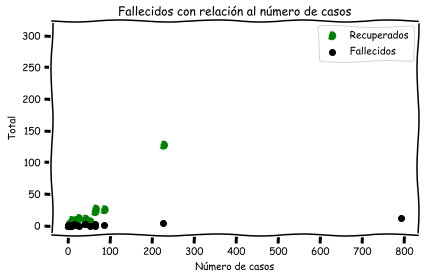

In [36]:
casos = Cuadro_Tasas['Total casos']

y = Cuadro_Tasas['Recuperados']

dev_x = casos
dev_y = y

plt.scatter(casos, dev_y, color= 'g', linestyle = '--', linewidth= 3, label='Recuperados')

y1= Cuadro_Tasas['Fallecidos']

plt.scatter(casos, y1, color ='k', linewidth=1, label= 'Fallecidos')


plt.title('Fallecidos con relación al número de casos')
plt.xlabel('Número de casos')
plt.ylabel('Total')
plt.legend(loc='upper right')

#plt.grid(True)

plt.tight_layout()
#plt.savefig('figure.png')
plt.show()

In [37]:
cuadro_basico

Fecha de notificación    Atención  Edad  \
Dpto            Municipio                                                     
Bogotá D.C.     Bogotá D.C.                    2020-03-02  Recuperado    19   
Valle del Cauca Guadalajara de Buga            2020-03-06  Recuperado    34   
Antioquia       Medellín                       2020-03-07  Recuperado    50   
                Medellín                       2020-03-09  Recuperado    55   
                Medellín                       2020-03-09  Recuperado    25   
...                                                   ...         ...   ...   
Bogotá D.C.     Bogotá D.C.                    2020-07-16        Casa    60   
                Bogotá D.C.                    2020-08-10        Casa    24   
                Bogotá D.C.                    2020-08-09        Casa    52   
                Bogotá D.C.                    2020-08-10        Casa    52   
                Bogotá D.C.                    2020-08-09        Casa    50   

                                    Sexo         Tipo Estado  \
Dpto            Municipio                                      
Bogotá D.C.     Bogotá D.C.            F    Importado   Leve   
Valle del Cauca Guadalajara de Buga    M    Importado   Leve   
Antioquia       Medellín               F    Importado   Leve   
                Medellín               M  Relacionado   Leve   
                Medellín               M  Relacionado   Leve   
...                                  ...          ...    ...   
Bogotá D.C.     Bogotá D.C.            M   En estudio   Leve   
                Bogotá D.C.            M   En estudio   Leve   
                Bogotá D.C.            F   En estudio   Leve   
                Bogotá D.C.            F   En estudio   Leve   
                Bogotá D.C.            F   En estudio   Leve   

                                    País de procedencia Fecha de muerte  \
Dpto            Municipio                                                 
Bogotá D.C.     Bogotá D.C.                      ITALIA             NaT   
Valle del Cauca Guadalajara de Buga              ESPAÑA             NaT   
Antioquia       Medellín                         ESPAÑA             NaT   
                Medellín                            NaN             NaT   
                Medellín                            NaN             NaT   
...                                                 ...             ...   
Bogotá D.C.     Bogotá D.C.                         NaN             NaT   
                Bogotá D.C.                         NaN             NaT   
                Bogotá D.C.                         NaN             NaT   
                Bogotá D.C.                         NaN             NaT   
                Bogotá D.C.                         NaN             NaT   

                                    Fecha diagnóstico Fecha recuperado  \
Dpto            Municipio                                                
Bogotá D.C.     Bogotá D.C.                2020-03-06       2020-03-13   
Valle del Cauca Guadalajara de Buga        2020-03-09       2020-03-19   
Antioquia       Medellín                   2020-03-09       2020-03-15   
                Medellín                   2020-03-11       2020-03-26   
                Medellín                   2020-03-11       2020-03-23   
...                                               ...              ...   
Bogotá D.C.     Bogotá D.C.                2020-08-13              NaT   
                Bogotá D.C.                2020-08-13              NaT   
                Bogotá D.C.                2020-08-13              NaT   
                Bogotá D.C.                2020-08-13              NaT   
                Bogotá D.C.                2020-08-13              NaT   

                                    Tipo recuperación  
Dpto            Municipio                              
Bogotá D.C.     Bogotá D.C.                       PCR  
Valle del Cauca Guadalajara de Buga               PCR  
Antioquia   

In [38]:
cuadro_basico.columns

Index(['Fecha de notificación', 'Atención', 'Edad', 'Sexo', 'Tipo', 'Estado',
       'País de procedencia', 'Fecha de muerte', 'Fecha diagnóstico',
       'Fecha recuperado', 'Tipo recuperación'],
      dtype='object')

In [39]:
cuadro_basico.index

MultiIndex([(        'Bogotá D.C.',         'Bogotá D.C.'),
            (    'Valle del Cauca', 'Guadalajara de Buga'),
            (          'Antioquia',            'Medellín'),
            (          'Antioquia',            'Medellín'),
            (          'Antioquia',            'Medellín'),
            (          'Antioquia',              'Itagüí'),
            ('Cartagena D.T. y C.', 'Cartagena de Indias'),
            (        'Bogotá D.C.',         'Bogotá D.C.'),
            (        'Bogotá D.C.',         'Bogotá D.C.'),
            (        'Bogotá D.C.',         'Bogotá D.C.'),
            ...
            (        'Bogotá D.C.',         'Bogotá D.C.'),
            (        'Bogotá D.C.',         'Bogotá D.C.'),
            (        'Bogotá D.C.',         'Bogotá D.C.'),
            (        'Bogotá D.C.',         'Bogotá D.C.'),
            (        'Bogotá D.C.',         'Bogotá D.C.'),
            (        'Bogotá D.C.',         'Bogotá D.C.'),
            (        'Bo

In [40]:
cuadro_basico.sort_values(by= ['Fecha de notificación'], inplace=True)

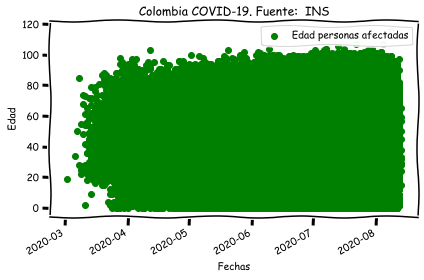

In [41]:
x = cuadro_basico['Fecha de notificación']

y = cuadro_basico['Edad']

dev_x = x
dev_y = y

#plt.plot_date(dev_x, dev_y, color= 'g', linestyle = '--', linewidth= 3, label='Recuperados')
plt.scatter(dev_x, dev_y, color= 'g', label='Edad personas afectadas')

plt.gcf().autofmt_xdate()
#y1= Cuadro_Tasas['Fallecidos']

#plt.scatter(dev_x, y1, color ='k', linewidth=1, label= 'Fallecidos')


plt.title('Colombia COVID-19. Fuente:  INS')

plt.xlabel('Fechas')
plt.ylabel('Edad')
plt.legend(loc='upper right')
#plt.grid(True)

plt.tight_layout()
#plt.savefig('figure.png')
plt.show()

In [42]:
Tasas.sort_values(by=['Fecha de notificación'], inplace=True, ignore_index=True)

In [43]:
Tasas

,Dpto,Municipio,Fecha de notificación,Atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnóstico,Fecha recuperado,Tipo recuperación,2020
0,Bogotá D.C.,Bogotá D.C.,2020-03-02,Recuperado,19,F,Importado,Leve,ITALIA,NaT,2020-03-06,2020-03-13,PCR,7743955
1,Valle del Cauca,Guadalajara de Buga,2020-03-06,Recuperado,34,M,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-19,PCR,128945
2,Antioquia,Medellín,2020-03-07,Recuperado,50,F,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-15,PCR,2533424
3,Bogotá D.C.,Bogotá D.C.,2020-03-08,Recuperado,28,F,Importado,Leve,ESPAÑA,NaT,2020-03-11,2020-03-23,PCR,7743955
4,Cartagena D.T. y C.,Cartagena de Indias,2020-03-08,Recuperado,85,F,Importado,Leve,ESTADOS UNIDOS,NaT,2020-03-11,2020-03-17,PCR,1028736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416342,Barranquilla D.E.,Barranquilla,2020-08-13,Casa,45,M,En estudio,Leve,NaN,NaT,2020-08-12,NaT,NaN,1274250
416343,Barranquilla D.E.,Barranquilla,2020-08-13,Casa,32,F,En estudio,Leve,NaN,NaT,2020-08-12,NaT,NaN,1274250
416344,Cundinamarca,Madrid,2020-08-13,Casa,33,M,En estudio,Leve,NaN,NaT,2020-08-03,NaT,NaN,127138
416345,Bolívar,Turbaco,2020-08-13,Casa,28,M,En estudio,Leve,NaN,NaT,2020-08-12,NaT,NaN,113440


In [44]:
type(Tasas.loc[0,'Fecha de muerte'])

pandas._libs.tslibs.nattype.NaTType

In [45]:
fallecidos = []
acumulados = []

In [46]:
Tasas['Fecha de notificación'].size

416347

In [47]:
x = Tasas['Fecha de notificación'].size
for i in range(0, x):
    if pd.isnull(Tasas.loc[i, 'Fecha de muerte']):
        fallecidos.append(0)
        if i == x:
            break
        else:
            acumulados.append(0)

    else:
        fallecidos.append(1)
        if i == x:
            break
        else:
            acumulados.append(0)

In [48]:
Tasas['Fallecidos'] = fallecidos  

In [49]:
Tasas['Fallecidos_acumulados'] = acumulados

In [50]:
Tasas

,Dpto,Municipio,Fecha de notificación,Atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnóstico,Fecha recuperado,Tipo recuperación,2020,Fallecidos,Fallecidos_acumulados
0,Bogotá D.C.,Bogotá D.C.,2020-03-02,Recuperado,19,F,Importado,Leve,ITALIA,NaT,2020-03-06,2020-03-13,PCR,7743955,0,0
1,Valle del Cauca,Guadalajara de Buga,2020-03-06,Recuperado,34,M,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-19,PCR,128945,0,0
2,Antioquia,Medellín,2020-03-07,Recuperado,50,F,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-15,PCR,2533424,0,0
3,Bogotá D.C.,Bogotá D.C.,2020-03-08,Recuperado,28,F,Importado,Leve,ESPAÑA,NaT,2020-03-11,2020-03-23,PCR,7743955,0,0
4,Cartagena D.T. y C.,Cartagena de Indias,2020-03-08,Recuperado,85,F,Importado,Leve,ESTADOS UNIDOS,NaT,2020-03-11,2020-03-17,PCR,1028736,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416342,Barranquilla D.E.,Barranquilla,2020-08-13,Casa,45,M,En estudio,Leve,NaN,NaT,2020-08-12,NaT,NaN,1274250,0,0
416343,Barranquilla D.E.,Barranquilla,2020-08-13,Casa,32,F,En estudio,Leve,NaN,NaT,2020-08-12,NaT,NaN,1274250,0,0
416344,Cundinamarca,Madrid,2020-08-13,Casa,33,M,En estudio,Leve,NaN,NaT,2020-08-03,NaT,NaN,127138,0,0
416345,Bolívar,Turbaco,2020-08-13,Casa,28,M,En estudio,Leve,NaN,NaT,2020-08-12,NaT,NaN,113440,0,0


In [51]:
for i in range(1, Tasas['Fallecidos'].size):
    Tasas.loc[i, 'Fallecidos_acumulados'] = (Tasas.loc[i-1,'Fallecidos_acumulados'] + Tasas.loc[i, 'Fallecidos'])
    

In [52]:
Tasas.loc[394343,'Fallecidos_acumulados'] 

13565

In [53]:
Tasas

,Dpto,Municipio,Fecha de notificación,Atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnóstico,Fecha recuperado,Tipo recuperación,2020,Fallecidos,Fallecidos_acumulados
0,Bogotá D.C.,Bogotá D.C.,2020-03-02,Recuperado,19,F,Importado,Leve,ITALIA,NaT,2020-03-06,2020-03-13,PCR,7743955,0,0
1,Valle del Cauca,Guadalajara de Buga,2020-03-06,Recuperado,34,M,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-19,PCR,128945,0,0
2,Antioquia,Medellín,2020-03-07,Recuperado,50,F,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-15,PCR,2533424,0,0
3,Bogotá D.C.,Bogotá D.C.,2020-03-08,Recuperado,28,F,Importado,Leve,ESPAÑA,NaT,2020-03-11,2020-03-23,PCR,7743955,0,0
4,Cartagena D.T. y C.,Cartagena de Indias,2020-03-08,Recuperado,85,F,Importado,Leve,ESTADOS UNIDOS,NaT,2020-03-11,2020-03-17,PCR,1028736,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416342,Barranquilla D.E.,Barranquilla,2020-08-13,Casa,45,M,En estudio,Leve,NaN,NaT,2020-08-12,NaT,NaN,1274250,0,13821
416343,Barranquilla D.E.,Barranquilla,2020-08-13,Casa,32,F,En estudio,Leve,NaN,NaT,2020-08-12,NaT,NaN,1274250,0,13821
416344,Cundinamarca,Madrid,2020-08-13,Casa,33,M,En estudio,Leve,NaN,NaT,2020-08-03,NaT,NaN,127138,0,13821
416345,Bolívar,Turbaco,2020-08-13,Casa,28,M,En estudio,Leve,NaN,NaT,2020-08-12,NaT,NaN,113440,0,13821


In [54]:
len(acumulados)

416347

In [55]:
len(fallecidos)

416347

In [56]:
Tasas.columns

Index(['Dpto', 'Municipio', 'Fecha de notificación', 'Atención', 'Edad',
       'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'Fecha de muerte',
       'Fecha diagnóstico', 'Fecha recuperado', 'Tipo recuperación', '2020',
       'Fallecidos', 'Fallecidos_acumulados'],
      dtype='object')

In [57]:
Tasas['Fallecidos'].sum()

13821

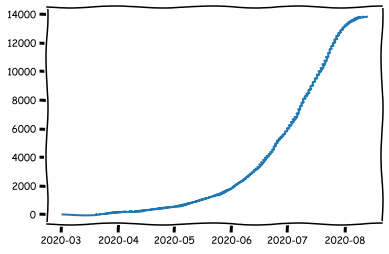

In [58]:
plt.plot(Tasas['Fecha de notificación'], Tasas['Fallecidos_acumulados'])

In [59]:
fallecidos_acumul =Tasas.sort_values(by= ['Fallecidos_acumulados'])

In [60]:
fallecidos_acumul.columns

Index(['Dpto', 'Municipio', 'Fecha de notificación', 'Atención', 'Edad',
       'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'Fecha de muerte',
       'Fecha diagnóstico', 'Fecha recuperado', 'Tipo recuperación', '2020',
       'Fallecidos', 'Fallecidos_acumulados'],
      dtype='object')

In [ ]:
plt.bar(fallecidos_acumul['Fecha de notificación'], fallecidos_acumul['Fallecidos_acumulados'])

<BarContainer object of 416347 artists>